# Лабораторна робота №4

## Обробка зображень та робота з наборами файлів цифрових зображень
### КН-222б Григоращенко П.А.

**Мета:** Отримати знання та навики в обробці цифрових зображень за допомогою бібліотек Pillow та/або OpenCV та роботі з обробки набору зображень.

**Завдання 1.** Робота з набором файлів.
1) Сформувати в папці на диску набір із 15 зображень різних форматів, розмірів та колірних моделей. Додати туди 2-3 файли, що не є зображеннями.
2) Створити функцію, що в якості аргумента приймає адресу папки на диску та повертає датафрейм з наступною інформацією про зображення, що знаходяться в папці:
    - ім'я файлу;
    - кольорову модель;
    - формат;
    - кількість каналів у зображенні;
    - розмір файлу у мегабайтах байтах, округлених до двох знаків після коми;
    - ширину картинки;
    - висоту картинки;
    - повний шлях до файлу;
    - зменшене зображення.

In [1]:
import os
import PIL
import glob
import random
import pandas as pd
from PIL import Image
from IPython.core.display import HTML

def to_dataframe(path):
    files, images = glob.glob(path), []
    for file in files:
        try:
            image = Image.open(file)
            images.append({
                'name': os.path.basename(file),
                'color model': image.mode,
                'format': image.format,
                'size': round(os.path.getsize(file) / (1024 ** 2), 2),
                'width': image.size[0],
                'height': image.size[1],
                'full path': file,
                'image': os.path.relpath(file, start = os.getcwd())
                })
        except Exception as e:
            pass
    return pd.DataFrame(images)
    
def image_formatter(image):
    return f'<img src="{image}" width="500" />'
    
df = to_dataframe(r"C:\Users\happy\Documents\University\Semester5\DataPython\Material\Lab5\*")
HTML(df.to_html(formatters={'image' : image_formatter}, escape=False))

,name,color model,format,size,width,height,full path,image
0,Screenshot 2024-11-16 161417.png,RGBA,PNG,0.09,253,183,C:\Users\happy\Documents\University\Semester5\DataPython\Material\Lab5\Screenshot 2024-11-16 161417.png,
1,Screenshot 2024-11-16 161426.png,RGBA,PNG,0.09,199,230,C:\Users\happy\Documents\University\Semester5\DataPython\Material\Lab5\Screenshot 2024-11-16 161426.png,
2,Screenshot 2024-11-16 161433.jpg,RGB,JPEG,0.02,210,201,C:\Users\happy\Documents\University\Semester5\DataPython\Material\Lab5\Screenshot 2024-11-16 161433.jpg,
3,Screenshot 2024-11-16 161517.png,RGBA,PNG,0.11,195,256,C:\Users\happy\Documents\University\Semester5\DataPython\Material\Lab5\Screenshot 2024-11-16 161517.png,
4,Screenshot 2024-11-16 161523.png,RGBA,PNG,0.05,274,158,C:\Users\happy\Documents\University\Semester5\DataPython\Material\Lab5\Screenshot 2024-11-16 161523.png,
5,Screenshot 2024-11-16 161627.png,RGBA,PNG,0.12,253,259,C:\Users\happy\Documents\University\Semester5\DataPython\Material\Lab5\Screenshot 2024-11-16 161627.png,
6,Screenshot 2024-11-16 161639.jpg,RGB,JPEG,0.02,211,211,C:\Users\happy\Documents\University\Semester5\DataPython\Material\Lab5\Screenshot 2024-11-16 161639.jpg,
7,Screenshot 2024-11-16 161700.jpeg,RGB,JPEG,0.02,174,307,C:\Users\happy\Documents\University\Semester5\DataPython\Material\Lab5\Screenshot 2024-11-16 161700.jpeg,
8,Screenshot 2024-11-16 161730.png,RGBA,PNG,0.06,176,169,C:\Users\happy\Documents\University\Semester5\DataPython\Material\Lab5\Screenshot 2024-11-16 161730.png,
9,Screenshot 2024-11-16 161750.png,RGBA,PNG,0.07,247,224,C:\Users\happy\Documents\University\Semester5\DataPython\Material\Lab5\Screenshot 2024-11-16 161750.png,


**Завдання 2.**
Створити функцію, що в якості аргумента приймає:

- шлях до папки;
- назва вихідного зображення;
- кількість зображень в рядку;
- кількість зображень в стовпчику

і повертає зображення постера.
<br>Вважаємо, що постер с прямокутним і число картинок в постері а x b, де а -
число стовпчиків, а b - число рядків.
<br>*Зауваження:*
1) Створити функцію, що перетворює картинку на квадрат з максимально можливим розміром сторони (наприклад, якщо картинка розміром 800х533, то вихідний розмір повинен бути 533х533). Обрізаємо картинку з двох країв, тобто розмір розраховуємо від центру.
2) Всі картинки, з яких створено постер, повинні бути однакового розміру, тобто після обрізки необхідно змінити розмір, наприклад, на 500х500.
3) Картинки для додавання в постер обирати випадковим чином. Картинки можуть повторюватись
4) На картинку «накласти фільтр» червоного, зеленого, синього, жовтого, пурпурного або голубого кольорів, що також обираються випадковим чином та можуть повторюватись.
5) Надати 3-4 варіанти постерів, що збережено у файлах на диску.
6) Використовувати зображення, що знаходяться в папці, що сформована в завданні 1
7) Для обробки зображень використовувати бібліотеки Pillow та/або OpenCV.

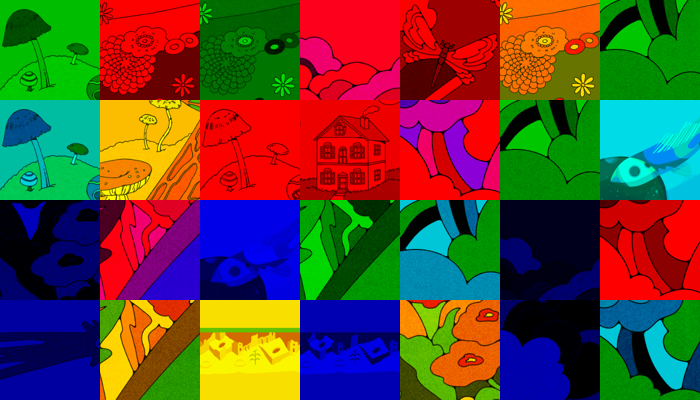

In [2]:
def to_square(image):
    copied = image.copy()
    halfside = min(copied.width, copied.height) // 2
    copied = copied.crop((copied.width // 2 - halfside, copied.height // 2 - halfside,
                         copied.width // 2 + halfside, copied.height // 2 + halfside))
    return copied

def to_poster(path, filename, columns, rows, side=200):
    images = [Image.open(x) for x in to_dataframe(path)['full path']]
    copied = [(to_square(x)).resize((side,side)) for x in images]
    poster = Image.new(mode='RGB', size=(side * columns, side * rows))
    filters = ['R', 'G', 'B', 'RG', 'RB', 'GB']
    for i in range(rows):
        for j in range(columns):
            image, f = copied[random.randint(0, len(copied) - 1)], filters[random.randint(0, len(filters) - 1)]
            bands = image.split()
            red, green, blue = bands[0], bands[1 % len(bands)], bands[2 % len(bands)]
            if 'R' not in f:
                red = bands[0].point(lambda x: 0)
            if 'G' not in f:
                green = bands[1].point(lambda x: 0)
            if 'B' not in f:
                blue = bands[2].point(lambda x: 0)
            poster.paste(Image.merge('RGB', (red, green, blue)), (j * side, i * side))
    poster.save(filename)
    return poster

to_poster(r"C:\Users\happy\Documents\University\Semester5\DataPython\Material\Lab5\*",
          r"C:\Users\happy\Documents\University\Semester5\DataPython\Material\Lab5\Posters\poster7x4custom.jpg", 7, 4, 100)

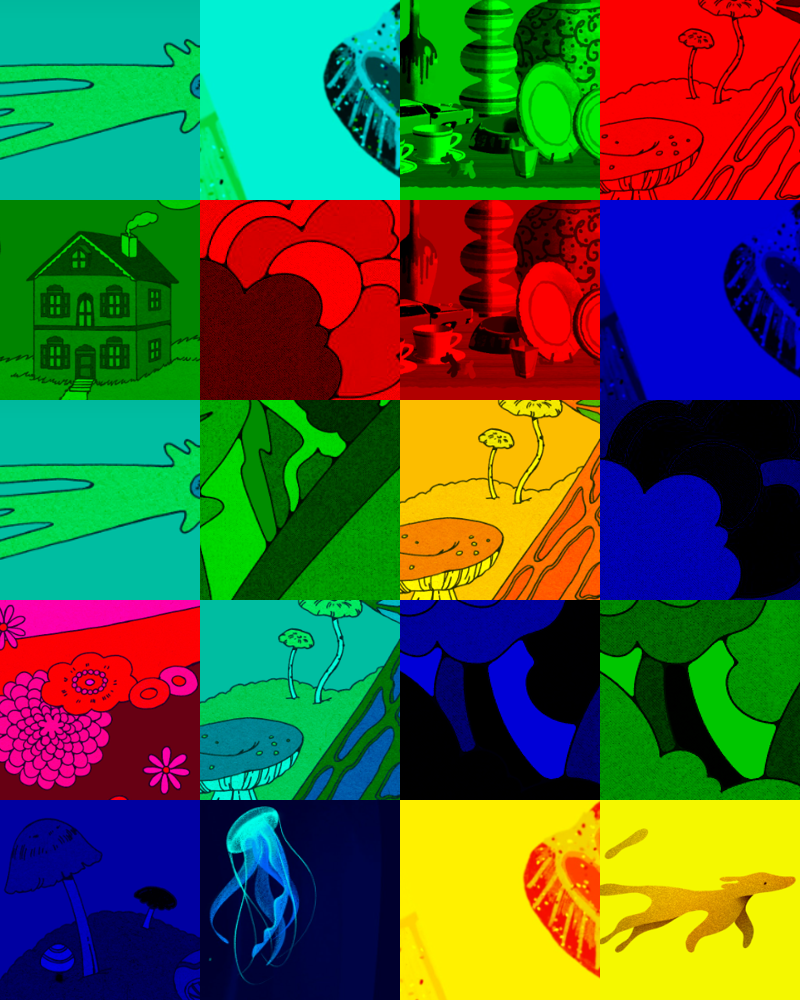

In [3]:
Image.open(r"C:\Users\happy\Documents\University\Semester5\DataPython\Material\Lab5\Posters\poster4x5.png")

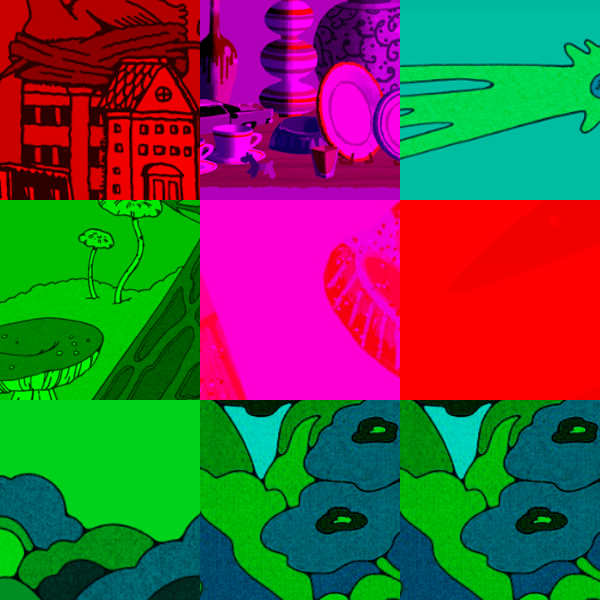

In [3]:
to_poster(r"C:\Users\happy\Documents\University\Semester5\DataPython\Material\Lab5\*",
          r"C:\Users\happy\Documents\University\Semester5\DataPython\Material\Lab5\Posters\poster3x3.jpg", 3, 3)